# WS06: Derivatives and Euler’s method

These exercises are indented to give you practice at using the material on numerical approximation and are intended to reinforce the material that was covered in lectures.

Please attempt the worksheet before your tutorial. Support is available in your tutorial or in the Class Team.

*These are partial solutions. Please create [Issues](https://gitlab.com/comp2421-numerical-computation/book/-/issues) and [Merge requests](https://gitlab.com/comp2421-numerical-computation/book/-/merge_requests) with your solutions.*

## Part a (pen and paper warm up)

### 1. interpretation of derivatives: speed = rate of change of displacement
Say you spent $1$ hour and walked $3$ miles, after another hour (2 hours later) and you walked $5$ miles in total, and 3 hours later you walked $6$ miles in total... generally you may spend $t$ hours and walk $d$ miles (called your displacement). Abstractly or mathematically, displacement $d$ can be expressed as a function of $t$: $d = d(t)$.

Your walking speed is the rate of change of (?).

Your walking speed $s$ is also a function of time $t$, denoted by $s = s(t)$. How do you compute the rate of change of speed? what's its physical meaning?

### 2. Compute the derivative by definition
 Definition of derivative of a function $d(t)$ at $t=t_0$:
 $$
 d^\prime(t_0) = \lim_{\Delta t\to 0} \frac{d(t_0+\Delta t) - d(t)}{\Delta t}.
 $$
 
If we know the general relation between $t$ and $d$, say $d(t) = -t^2+t+1$, can you compute $d^\prime(1)$?


### 3. Approximation of  derivatives
If we do NOT know the general relation between $t$ and $d$, but we know
$$
d(1) = 1 \quad\text{and}\quad  d(1+0.01) = 0.9899,
$$
can you approximate $d^\prime(1)$ using the definition of derivative?


### 4. Differential equation (Euler's method)
If we do NOT know the general relation between $t$ and $d$, but we know
$$
d^\prime(t) = t^2 -3t + d
$$
- Use your idea for question 3 and the definition of derivative, given an arbitrary $\Delta t$, to approximate $d^\prime(t)$ in this differential equation. What you get is just the Euler's formula.
- let $\Delta t = 0.01$, and $d(0) =1$, use Euler's method to compute $d(0.01)$ and $d(0.02)$.


## Part b (code implementations and testing)

### 5. Implement Euler's method

For the same problem in Q4, compute all these 100 function values: $d(0.01)$, $d(0.02)$, $d(0.03)$ ... $d(1.00)$.

In [1]:
import numpy as np

In [2]:
def Euler_method(t0, d0, dt, n):
    d = np.zeros(n+1)
    d[0] = d0

    t = np.zeros(n+1)
    for i in range(n+1):
        t[i] = t0 + i*dt
    
    for i in range(1, n+1):          
        d[i] = d[i-1] + dt * f(t[i-1], d[i-1])
                                       
    return t, d

### 6. Test your implementation

Use the example in Q4 to test your implementation and compare with the exact solution: $d(t) = -t^2 +t +1$

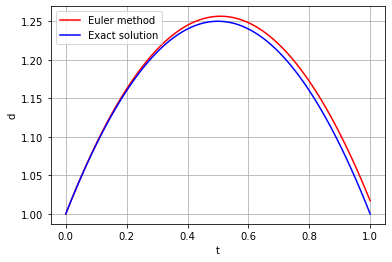

In [3]:
def f(t, d):
    return t*t - 3.0*t + d

def d_exact(t):
    return -t*t + t + 1.0

t0 = float(0.0)
d0 = float(1.0)
dt = float(0.01)
n = int(100)

t, d = Euler_method(t0, d0, dt, n)

de = np.zeros(n+1)
for i in range(n+1):
    de[i] = d_exact(t[i])
    

import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(t, d, "-r", label="Euler method")
plt.plot(t, de, "-b", label="Exact solution")
plt.legend(loc="upper left")
plt.xlabel("t")
plt.ylabel("d")
plt.grid()
plt.show()


## Part c: Extension

Derivative is a very important concept non only in math but in all science. We interpret derivative as the rate of change of variable. For example, the derivative of displacement $d$ with respective to time is velocity $v$, and the derivative of velocity $v$ with respective to time is acceleration $a$:
$
d^\prime(t) = v(t)  \quad \text{and} \quad  v^\prime(t) = a(t).
$

### 7. derivative as the tangent of a curve

We know $y=f(x)$ can be plotted in a x-y plane as a curve. For example, $y=2x+1$ is a line and $y=x^2 + x -4$ is a parabola. Recall the definition of derivative of $f(x)$:
 $$
 f^\prime(x_0) = \lim_{\Delta x\to 0} \frac{f(x_0+\Delta x) - f(x)}{\Delta x}.
 $$
 
- Draw a curve such as $y=x^2$ on the x-y plane, say $x_0=1$, $\Delta x=1$, so what is the meaning of 
 $$
\frac{f(x_0+\Delta x) - f(x)}{\Delta x}?
 $$
- As $\Delta x$ becomes smaller and smaller... goes to 0, you would get the geometrical meaning of $f^\prime(x_0)$, what's that?

### 8. Euler's method

Given $f(x_0)$ at a particular point $x_0$, and the derivative $f^\prime(x)$ everywhere, we then try to find the curve (compute $f(x)$ for all $x$)... Euler's method can do this job step by step (one iteration after another)!
- Use the above geometrical meaning of the derivative in Q7 and think why Euler's method can do this job.
- Comparing with the rate-of-change interpretation: given your position or displacement $d(t_0)$ at a particular time $t_0$, and your speed $d^\prime(t)$ for all the time, how to compute your position for all the time.